# Hierarchical clustering and dendrograms
* X dataset (n x m array) of points to cluster
* n number of data
* m number of features
* Z cluster link array with join information
* k number of clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


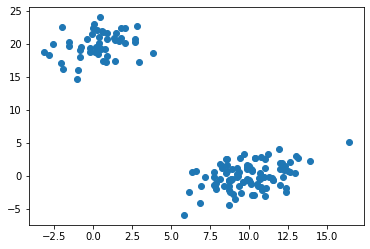

In [2]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
Z = linkage(X, "ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Cophenetic correlation coefficient: Compares the two-to-two distances of the samples with those that have been carried out with hierarchical clustering. The closer the value is to 1, the better the clustering will be, since it will preserve the original distances between the different observations.

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c, coph_distance = cophenet(Z, pdist(X))
c

0.9800148387574268

We have a 98% conservation of the original distances with respect to the clusterings that have been generated.

In [6]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

With Z[0] it tells us that data 52 and data 53 have a distance of 4.15105485e-02

In [7]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

The next one that has been joined is 14 with 79, which have a distance of 5.91375926e-02

In [8]:
# Looking at the first 20 elements
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

We can see that in [6.20000000e+01, 1.52000000e+02, 1.72599535e-01, 3.00000000e+00], element 152 appears (this cluster has already been formed from the originals because it is a number greater than the length of the array), that is why the number three appears, because in cluster 152 there are already two data, and by joining 62, we have this new cluster of 3 elements.

Let's see what cluster 152 contains:

In [9]:
Z[152-len(X)] # cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

The next iteration we can see that joins 41 with 158. Who lives at 158?

In [10]:
Z[158-len(X)]

array([15.        , 69.        ,  0.11428971,  2.        ])

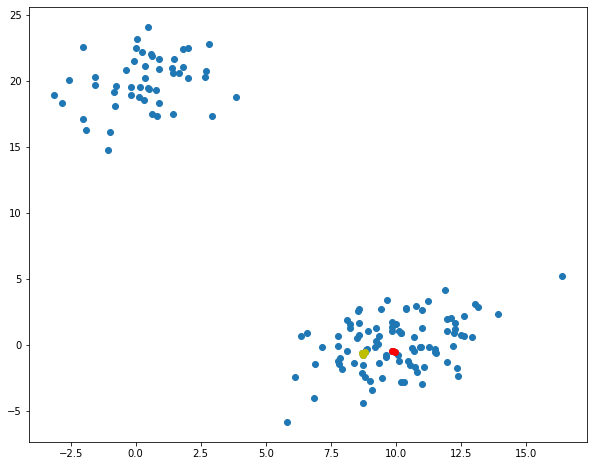

In [11]:
# The elements corresponding to cluster 152 are 33 and 68, the cluster 158 contains 15 and 69, we can see this points in a graph:
idx = [33, 68, 62]
idx2 = [15, 69, 41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idx, 0], X[idx,1], c = 'r') 
plt.scatter(X[idx2, 0], X[idx2,1], c = 'y')
plt.show()

### Graphic representation of a dendrogram

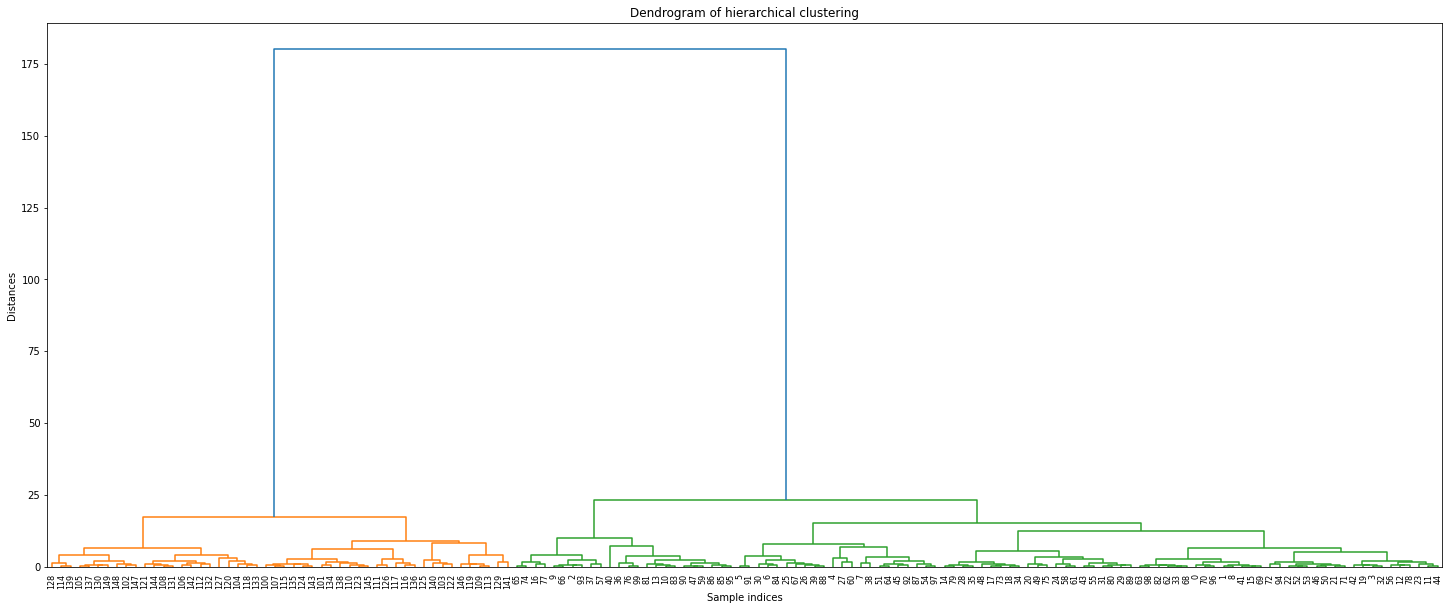

In [12]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram of hierarchical clustering")
plt.xlabel("Sample indices")
plt.ylabel("Distances")
dendrogram(Z, leaf_rotation=90., leaf_font_size = 8.0)
plt.show()

In [13]:
# Last elements
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

We can see that the last cluster joins at 180.27 points away corresponding to the value of the final horizontal line that we see in the blue dendrogram.

Looking at the dendrogram, perhaps having a green cluster of 100 elements and another orange cluster of 50 could be a good segmentation.

In the dendrogram we can establish a color_threshold from which we want to paint the clusters with different colors (default = 70% of the final value).

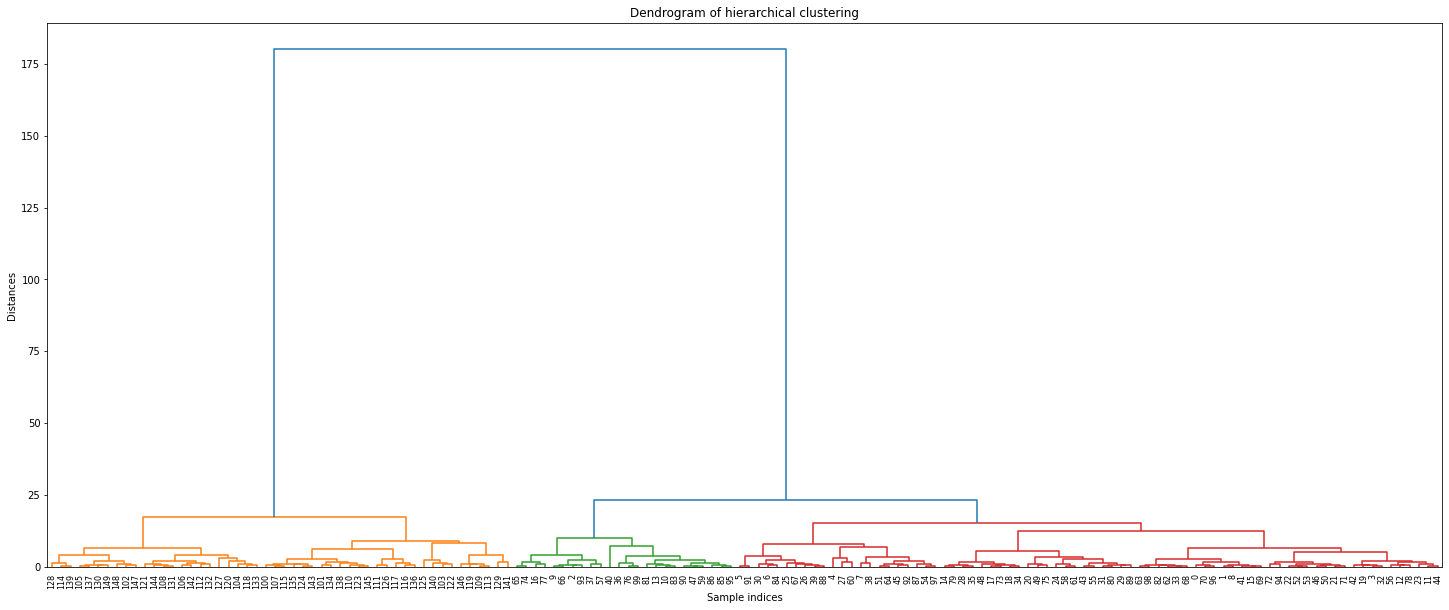

In [16]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram of hierarchical clustering")
plt.xlabel("Sample indices")
plt.ylabel("Distances")
dendrogram(Z, leaf_rotation=90., leaf_font_size = 8.0, color_threshold = 0.1*180) # 10%
plt.show()

### Truncate the dendrogram
Specify a reduced version of the dendrogram that does not involve as many elements and is faster to execute.

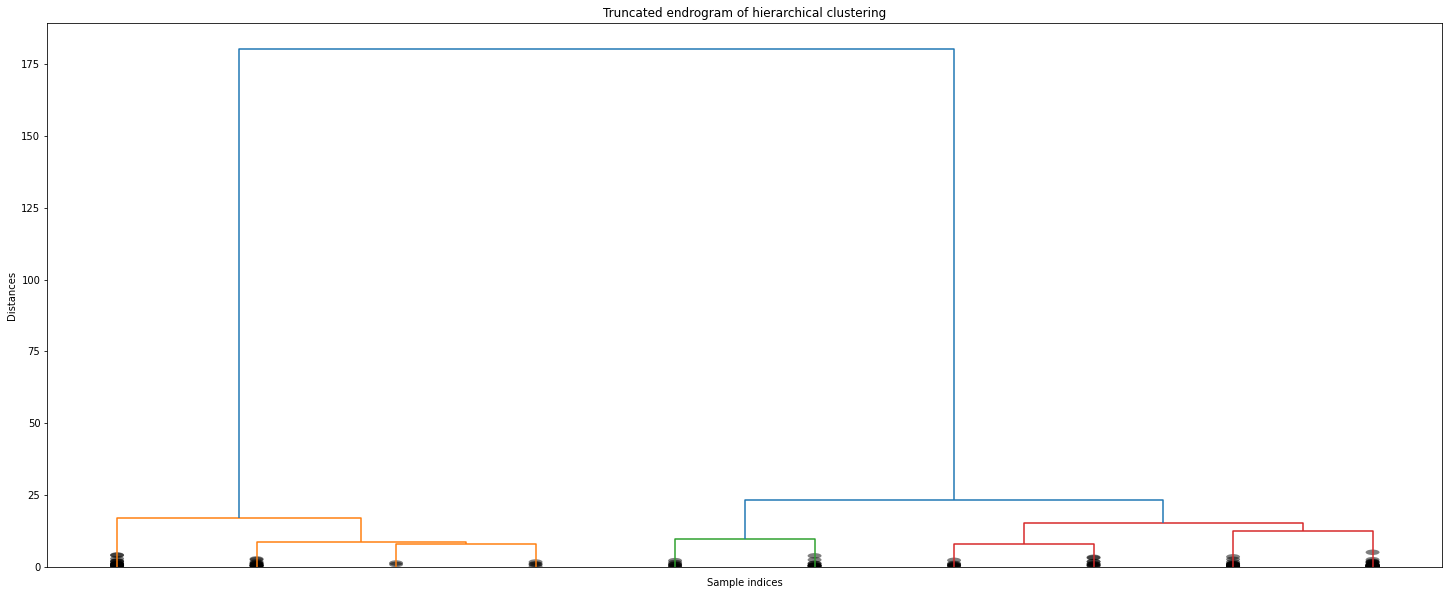

In [17]:
plt.figure(figsize=(25,10))
plt.title("Truncated endrogram of hierarchical clustering")
plt.xlabel("Sample indices")
plt.ylabel("Distances")
dendrogram(Z, leaf_rotation=90., leaf_font_size = 8.0, color_threshold = 0.1*180,
            truncate_mode="lastp", p = 10, show_leaf_counts=False, show_contracted=True) # last p clster joined, show_leaf_counts=Used to show or hide the elements of the leaf nodes, 
        # show_contracted: Avoid overloading the graph
plt.show()

Each element has been collapsed (only the last 10 joins are shown). The show_contracted allows drawing black balls at the heights of the previous clusters so that it helps the visualization. It gives us an idea of how many elements there are in each vertical line.
With show_leaf_counts set to True, how many elements are part of the cluster will appear.

### Tuned Dendrogram

In [23]:
def tuned_dendrogram(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title("Hierarchical Clustering with truncated Dendrogram")
        plt.xlabel("Cluster size")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x,y, 'o', c = c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5), textcoords="offset points", va = "top", ha = "center")

    if max_d:
        plt.axhline(y = max_d, c = 'k')

    return ddata
    

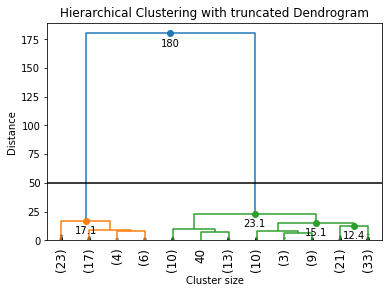

In [26]:
tuned_dendrogram(Z, truncate_mode = 'lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12., show_contracted = True,
                 annotate_above = 10, max_d = 50)
plt.show()

## Automatic dendrogram cutting

Inconsistency method:

What makes a distance from one cluster to another jump? Which of these distances do we consider to be a sufficiently important quantitative jump?
We could compare each height at which the clusters join (h) with the average height and normalize the standard deviation of each and every one of the union depths with respect to previous levels.

inconsistency_i = (h_i-avg(h_j))/std(h_j)

In [27]:
from scipy.cluster.hierarchy import inconsistent

In [29]:
depth = 5
incons = inconsistent(Z, depth)
incons # columns: average, standard deviation, number of elements, inconsistency factor for each of the unions

array([[4.15105485e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.91375926e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.10677929e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.13712071e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.54313099e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09277896e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.10071548e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.13022407e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.14289714e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21200766e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21671017e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.24900190e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40277358e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21833664e-01, 7.17937830e-02, 2.00000000e

In [30]:
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

With a depth of 5 we can see that in the last union the value is much greater than in the previous ones.
What the inconsistency formula does is compare the height at which each cluster h_i joins with the union average and normalizes it in all the clusters of as many previous depth levels as we have specified depth.

In [32]:
# Si en lugar de usar 5, usamos 2:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

We see that the inconsistency factor changes a lot and this gives us an idea that the inconsistency values are super dependent on the depth over which the average has been calculated as the deviation. Another problem is that the previous d levels of heights are most likely not normally distributed (the first levels are linked to lower heights than the last ones), so probably the next level that is analyzed at each moment is considered an outlier if it were a normal distribution with respect to each and every one of the above, therefore, the normalization (inconsistency) is a bit inefficient and the typed value of the inconsistency factor could not help much.

### Elbow method
Try to find the step of clustering where the acceleration of distance growth is greatest. The largest elbow that can be generated when drawing the line of increments of distances from one cluster to another.

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


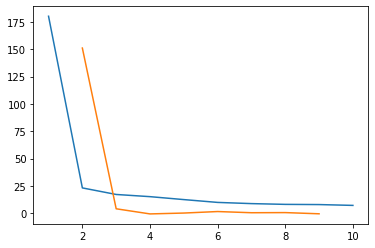

Número optimo de cluster es : 2


In [43]:
last = Z[-10:,2] # we grab the last 10 distances
last_rev = last[::-1] # reverse the distances
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)


acc = np.diff(last, 2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()

k = acc_rev.argmax() + 2
print("Optimal cluster number is : {}".format(k))

You can see the elbow where the greatest distance is 180.27, the penultimate cluster formed is at 23.121 and you can see a very aggressive elbow.

The orange curve can be seen the differences in increments (accelerations or changes in distances); From the first to the second there is a change of approximately 150 points, from the second to the third there is a change of about 5, so one clearly sees that the cluster where the maximum acceleration is formed is with 2 clusters.

The problem with this method is that a point is needed on the right and a point on the left of the dataset, which implies that we need at least two clusters and the conclusion can never be that all the information must be within a single cluster.

Another problem is that when np.diff is made of the last ones in pairs, the order of the distances is also important, since the order of the distances of the last elements does not have to correctly reflect the order of the unions of any of them. the innermost branches of the tree, it could be that perhaps the biggest jump is not at the end but at the beginning. So painting all the elements in the dendrogram could be very large.

Adding more data to what we already have and seeing what happens.

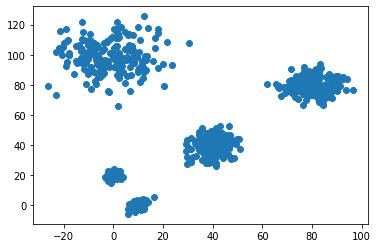

In [44]:
c = np.random.multivariate_normal([40,40], ([20,1],[1,30]), size = [200,])
d = np.random.multivariate_normal([80,80], ([30,1],[1,30]), size = [200,])
e = np.random.multivariate_normal([0,100], ([100,1],[1,100]), size = [200,])
X2 = np.concatenate((X, c, d, e))
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [45]:
Z2 = linkage(X2, "ward")

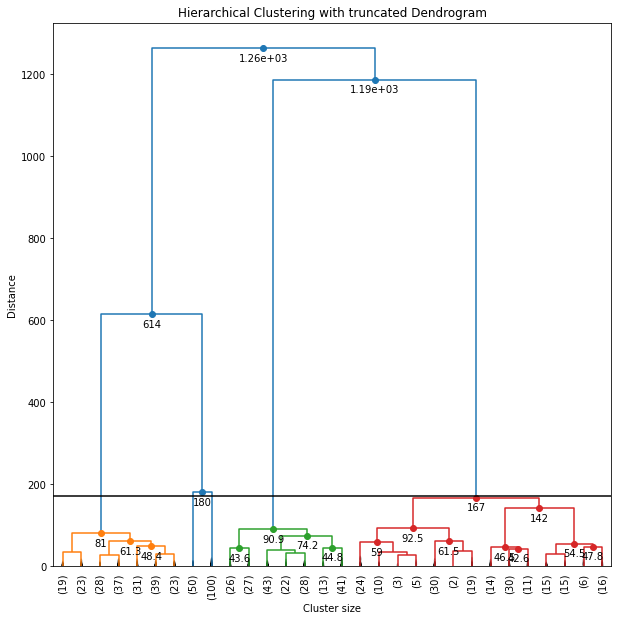

In [46]:
plt.figure(figsize = (10,10))
tuned_dendrogram(Z2, truncate_mode = "lastp", p = 30, leaf_rotation = 90., leaf_font_size = 10., show_contracted = True, annotate_above = 40, max_d = 170)
plt.show()

Here it is more difficult to decide where to cut. The elbow method will most likely tell us that the jump between 167 (red) and 180 (light blue) is minimal and will tell us that the cut-off point has to be above, giving us four clusters, instead of below and ending dividing that cluster of height 180.

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


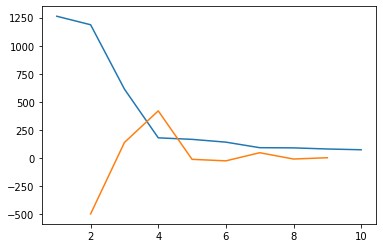

Optimal cluster number is : 4


In [47]:
last = Z2[-10:,2] # we grab the last 10 distances
last_rev = last[::-1] # reverse the distances
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)


acc = np.diff(last, 2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()

k = acc_rev.argmax() + 2
print("Optimal cluster number is : {}".format(k))

We can see the last two clusters that join at a very close distance (1262 and 1186), the next jump is at 614, then 180, etc. As we mentioned, the method tells us that the optimal number of clusters is 4. This maximum change occurs in both the acceleration and the distance itself.

In [49]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


With the inconsistency we see that there is not a big difference between 5.22 and 5.13, so beyond the statistics, it is necessary to know the context in which we are working and give a vision and know what we are talking about. Experts can shed some light to make final decisions.

For example, the cluster that is at a distance of 180 is the one we analyzed before and in the graph we can see that the human eye separates these two clusters giving a number of five, however, with the elbow method it gives us a value of 4 Due to the large number of points and their separation, therefore, it is important to correctly interpret them and turn to those who know more about the topic and the dataset.